In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os
from pylab import rcParams

rcParams['figure.figsize'] = 12, 5
sizetitle = 22
ticksize = 20
params = {'font.family':'sans-serif','font.sans-serif':'PT Sans','legend.fontsize': 15,'legend.handlelength': 2,'axes.labelsize':18, 'xtick.labelsize': ticksize, 'ytick.labelsize': ticksize,'figure.constrained_layout.use': True}
plt.rcParams.update(params)

In [2]:
#clase que hace las g2 dados unos datos 
class g2:
    def __init__(self,ruta1,ruta2,ax):
        self.xls = pd.ExcelFile(ruta1) #importa los datos de la g2
        self.ax = ax
        a = pd.read_excel(self.xls,decimal=',')
        self.tau_fit = a['tau (s) - HBT Measurement']
        self.g2_fit = a['g^(2)(tau) - HBT Measurement']
        self.tau_none = a['tau (s) - none Fit']
        self.g2_none = a['g^(2)(tau) - none Fit']
        #arregla los datos teniendo en cuenta su orden de magnitud
        self.fix(self.g2_fit)  
        self.fix(self.tau_fit)
        self.fix(self.tau_none)
        #fix(g2_none)
        
        #importa los datos de los conteos de la g2
        self.xls2 = pd.ExcelFile(ruta2)
        a2 = pd.read_excel(self.xls2,decimal=',')
        self.cont1 = a2['Count rates (per second) - Singles 1']
        self.cont2 = a2['Count rates (per second) - Singles 2']
        self.coinc = a2['Count rates (per second) - Coinc 1+2']
        #arregla los datos teniendo en cuenta su orden de magnitud
        self.fix(self.cont1)
        self.fix(self.cont2)
        self.fix(self.coinc)
    
    #Metodo que arregla los datos segun su orden de magnitud y si no se cambio la , por . 
    def fix(self,lista):
        for i in range(len(lista)):
            if type(lista[i]) == int or type(lista[i]) == float or type(lista[i])==np.int64:
                pass
            elif 'n' in lista[i]: 
                lista[i] = float(lista[i].replace('n',"e-9").replace(',',".")) 
            elif 'k' in lista[i]: 
                lista[i] = float(lista[i].replace('k',"e3").replace(',',".")) 
            elif 'p' in lista[i]:
                lista[i] = float(lista[i].replace('p',"e-12").replace(',',"."))
            elif 'm' in lista[i]:
                lista[i] = float(lista[i].replace('m',"e-3").replace(',',"."))
            else:
                lista[i] = float(lista[i])
        lista = np.array(lista)
    
    #Grafica las g2
    def graficar(self,ordenes,rango,n):
        self.ax.plot(self.tau_fit*ordenes[0],self.g2_fit*ordenes[1], label=n+'\n{}$\pm${} Hz'.format(int(self.coinc.mean()),int(np.sqrt(self.coinc.mean())))+'\n'+'$g^2$ max {}'.format(round(max(self.g2_fit),2)))
        tamaL = 15
        tamaN = 12
        self.ax.set_xlabel(r'$\tau$', fontsize=tamaL)
        self.ax.set_ylabel(r'$g^{(2)}(\tau)$', fontsize=tamaL)
        self.ax.set_xticklabels(['{}ns'.format(i) for i in list(rango[0])])
        self.ax.legend()
        #plt.xticks(fontsize=tamaN)
        #plt.yticks(fontsize=tamaN)
        #self.ax.text(-15, max(self.g2_fit*ordenes[1]),n+'\nmean coincidences {}'.format(round(self.coinc.mean(),2))+'\n'+'max $g^2$ {}'.format(round(max(self.g2_fit),2)),bbox=dict(facecolor='white', alpha=0.5),fontsize=15, verticalalignment='top',color='black')
    
    def coinci(self): 
        tiempo = np.linspace(0,max(self.cont1),len(self.cont1))
        plt.plot(tiempo,self.cont1)

<ipython-input-2-0b94bc6142cf>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista[i] = float(lista[i].replace('m',"e-3").replace(',',"."))
<ipython-input-2-0b94bc6142cf>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista[i] = float(lista[i].replace('n',"e-9").replace(',',"."))
<ipython-input-2-0b94bc6142cf>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista[i] = float(lista[i].replace('p',"e-12").replace(',',"."))
<ipyth

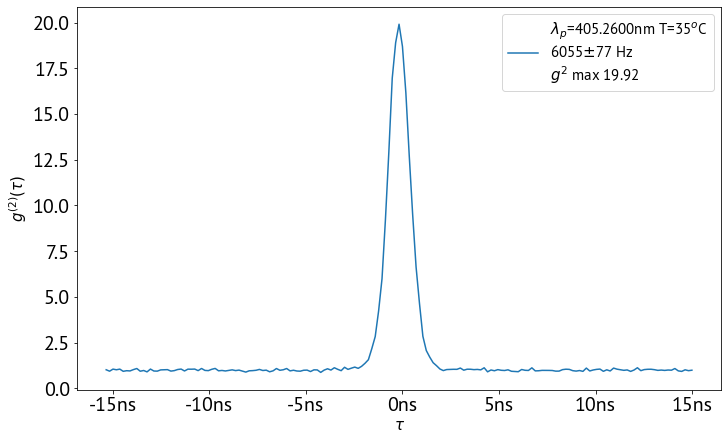

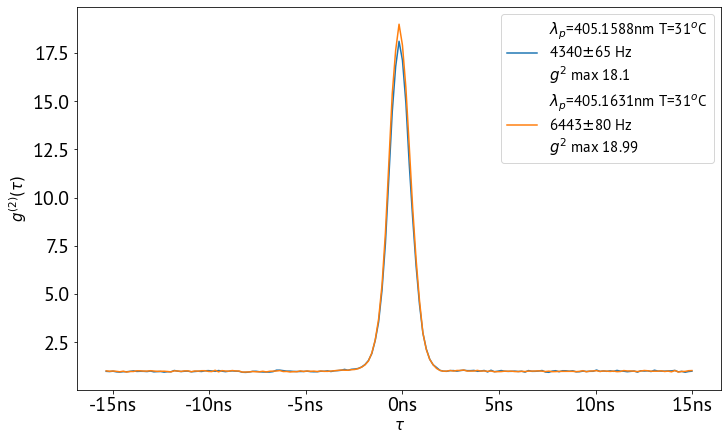

In [3]:
#ruta de los datos 
ruta1 = '/Users/mariamorris/Documents/Universidad/Monografía/Datos/21-Junio/17 Junio/2da g2 35C.xlsx'
ruta1b = '/Users/mariamorris/Documents/Universidad/Monografía/Datos/21-Junio/17 Junio/2da g2 35C conteos.xlsx'

ruta2 = '/Users/mariamorris/Documents/Universidad/Monografía/Datos/21-Junio/17 Junio/3ra g2 31C.xlsx'
ruta2b = '/Users/mariamorris/Documents/Universidad/Monografía/Datos/21-Junio/17 Junio/3ra g2 31C conteos.xlsx'

ruta3 = '/Users/mariamorris/Documents/Universidad/Monografía/Datos/21-Junio/17 Junio/4ta g2 31C.xlsx'
ruta3b = '/Users/mariamorris/Documents/Universidad/Monografía/Datos/21-Junio/17 Junio/4ta g2 31C conteos.xlsx'

ordenes = [10**9,1]
rango = [np.arange(-20, 20, 5),np.arange(-0.5, 4.3, 0.5)]

fig, ax = plt.subplots(figsize=(10, 6))
C35_405 = g2(ruta1,ruta1b,ax)
C35_405.graficar(ordenes,rango,r'$\lambda_p$=405.2600nm T=35$^o$C')
plt.savefig('/Users/mariamorris/Documents/Universidad/Monografía/Imágenes/Resultados/g2/405.26_36.png')

fig, ax = plt.subplots(figsize=(10, 6))
C31_405 = g2(ruta2,ruta2b,ax)
C31_405.graficar(ordenes,rango,r'$\lambda_p$=405.1588nm T=31$^o$C')
plt.savefig('/Users/mariamorris/Documents/Universidad/Monografía/Imágenes/Resultados/g2/405.15_31.png')

#fig, ax = plt.subplots(figsize=(10, 6))
C31_405_2 = g2(ruta3,ruta3b,ax)
C31_405_2.graficar(ordenes,rango,r'$\lambda_p$=405.1631nm T=31$^o$C')
plt.legend()
#plt.xlim()
plt.savefig('/Users/mariamorris/Documents/Universidad/Monografía/Imágenes/Resultados/g2/405.16_31_part2.png')


<ipython-input-2-0b94bc6142cf>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista[i] = float(lista[i].replace('m',"e-3").replace(',',"."))
<ipython-input-2-0b94bc6142cf>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista[i] = float(lista[i].replace('n',"e-9").replace(',',"."))
<ipython-input-2-0b94bc6142cf>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista[i] = float(lista[i].replace('p',"e-12").replace(',',"."))
<ipyth

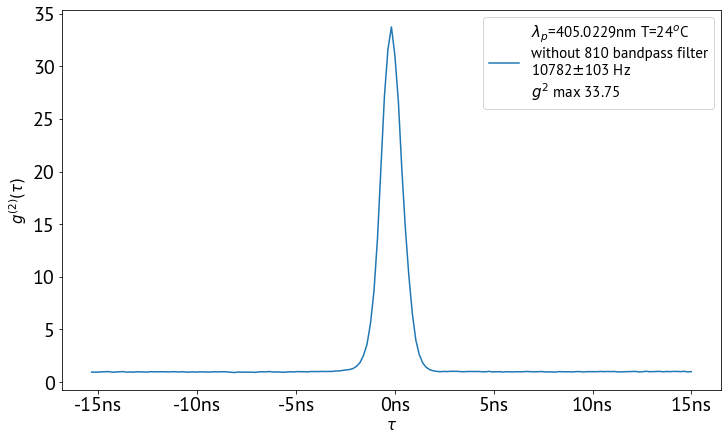

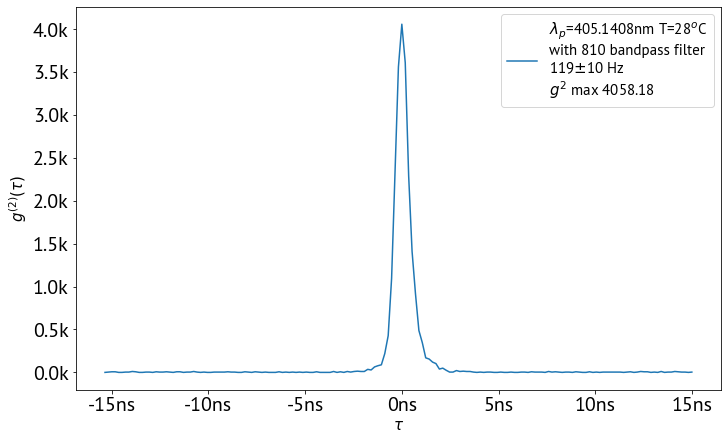

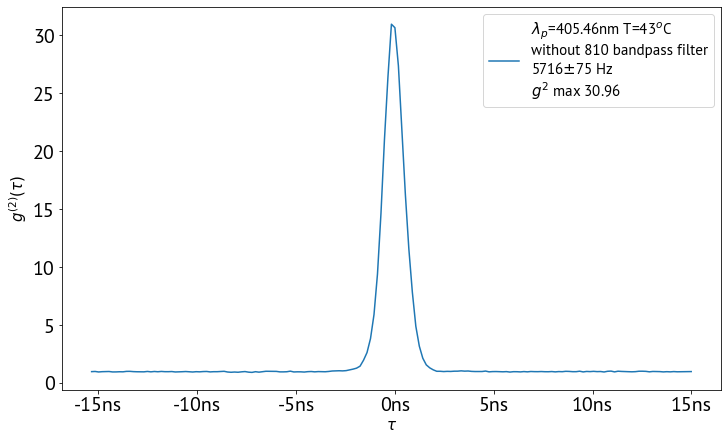

In [4]:
ruta1 = '/Users/mariamorris/Documents/Universidad/Monografía/Datos/21-Junio/21 Junio/g2-1 24C 405.0229.xlsx'
ruta2 = '/Users/mariamorris/Documents/Universidad/Monografía/Datos/15-Mayo/405.1408.xlsx'
ruta3 = '/Users/mariamorris/Documents/Universidad/Monografía/Datos/21-Junio/18 junio/43C 405.46nm g2.xlsx'

ruta1b = '/Users/mariamorris/Documents/Universidad/Monografía/Datos/21-Junio/21 Junio/g2-1 24C 405.0166 conteos1.xlsx'
ruta2b = '/Users/mariamorris/Documents/Universidad/Monografía/Datos/15-Mayo/405.1408 - 2 conteos.xlsx'
ruta3b = '/Users/mariamorris/Documents/Universidad/Monografía/Datos/21-Junio/18 junio/43C 405.46nm.xlsx'

ordenes = [10**9,1]
rango = [np.arange(-20, 20, 5),np.arange(-0.5, 4.3, 0.5)]

fig, ax = plt.subplots(figsize=(10, 6))
sf_405 = g2(ruta1,ruta1b,ax)
sf_405.graficar(ordenes,rango,r'$\lambda_p$=405.0229nm T=24$^o$C' + '\nwithout 810 bandpass filter')
plt.savefig('/Users/mariamorris/Documents/Universidad/Monografía/Imágenes/Resultados/g2/405_con810.png')
#fig, ax = plt.subplots(figsize=(10, 6))
#sf_405.coinci()

fig2, ax2 = plt.subplots(figsize=(10, 6))
ordenes2 = [10**9,10**-3]
jun21_405 = g2(ruta2,ruta2b,ax2)
jun21_405.graficar(ordenes2,rango,r'$\lambda_p$=405.1408nm T=28$^o$C' + '\nwith 810 bandpass filter')
ax2.set_yticklabels(['{}k'.format(i) for i in list(rango[1])])
plt.savefig('/Users/mariamorris/Documents/Universidad/Monografía/Imágenes/Resultados/g2/405_sin810.png')

fig3, ax3 = plt.subplots(figsize=(10, 6))
sf_405_43 = g2(ruta3,ruta3b,ax3)
sf_405_43.graficar(ordenes,rango,r'$\lambda_p$=405.46nm T=43$^o$C' + '\nwithout 810 bandpass filter')
plt.savefig('/Users/mariamorris/Documents/Universidad/Monografía/Imágenes/Resultados/g2/405_43C.png')